 # 3. Data Quality Assessment

* 3.1 Missing Values
* 3.2 Duplicate Records
* 3.3 Categorical Consistency
* 3.4 Score Validation (IMPORTANT)RTANT)

In [17]:
#1.1 Load the data
import pandas as pd

df = pd.read_csv("C:\\Users\\student\\Downloads\\DataSet StudentsPerformances.csv")


In [18]:
# MISSING VALUES
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 3.2 duplicates

In [20]:
#duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# 3.3 Categorical Consistency

 Identify Categorical Columns

In [21]:
# Check unique values for a column to find inconsistencies
print(df['parental level of education'].unique())


["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


2. Standardize and Convert

In [23]:
# Standardize casing and strip whitespace
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower().astype('category')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group b           bachelor's degree      standard   
1    female        group c                some college      standard   
2    female        group b             master's degree      standard   
3      male        group a          associate's degree  free/reduced   
4      male        group c                some college      standard   
..      ...            ...                         ...           ...   
995  female        group e             master's degree      standard   
996    male        group c                 high school  free/reduced   
997  female        group c                 high school  free/reduced   
998  female        group d                some college      standard   
999  female        group d                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

# Score validation


1. Logical Range Validation

In [24]:
# Identify scores outside the 0-100 range
score_cols = ['math score', 'reading score', 'writing score']
invalid_scores = df[~df[score_cols].apply(lambda x: x.between(0, 100)).all(axis=1)]

# Clean by clipping values to the 0-100 boundary
df[score_cols] = df[score_cols].clip(0, 100)


In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group b,bachelor's degree,standard,none,72,72,74
1,female,group c,some college,standard,completed,69,90,88
2,female,group b,master's degree,standard,none,90,95,93
3,male,group a,associate's degree,free/reduced,none,47,57,44
4,male,group c,some college,standard,none,76,78,75


2. Statistical Outlier Detection

In [27]:
# 1. Calculate Quartiles and IQR
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter for outliers at both ends
outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]

# 4. Display Results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"\nTotal Outliers detected: {len(outliers)}")
print("-" * 30)
print(outliers[['gender', 'math score']])


Lower Bound: 27.0
Upper Bound: 107.0

Total Outliers detected: 8
------------------------------
     gender  math score
17   female          18
59   female           0
145  female          22
338  female          24
466  female          26
787  female          19
842  female          23
980  female           8


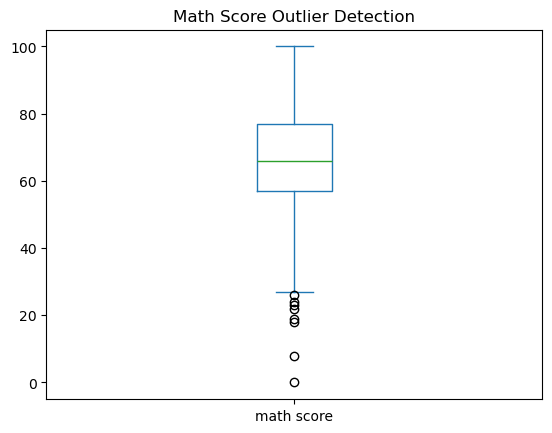

In [28]:
import matplotlib.pyplot as plt

df['math score'].plot(kind='box', title='Math Score Outlier Detection')
plt.show()


In [29]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000
